# Code to transmit the Data to the FPGA

In [1]:
import serial.tools.list_ports
import matplotlib.pyplot as plt
ports = serial.tools.list_ports.comports()

for port, desc, hwid in sorted(ports):
        print("{}: {} [{}]".format(port, desc, hwid))

COM4: USB Serial Port (COM4) [USB VID:PID=0403:6010 SER=210183BB770BB]
COM5: Standard Serial over Bluetooth link (COM5) [BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_LOCALMFG&0000\9&9E7436E&0&000000000000_00000000]
COM6: Standard Serial over Bluetooth link (COM6) [BTHENUM\{00001101-0000-1000-8000-00805F9B34FB}_VID&000105D6_PID&000A\9&9E7436E&0&F40034088096_C00000000]


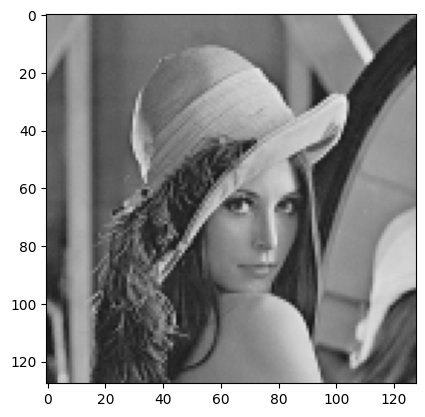

In [2]:
import numpy as np
import cv2

def int_to_signed_8bit(x):
    return format(x & 0xFF, '08b')

def signed_8bit_to_int(b):
    x = int(b, 2)
    return x if x < 128 else x - 256

# Load and shift image
im = cv2.imread("lenna_128x128.png", cv2.IMREAD_GRAYSCALE).astype(np.int16) - 128

# Write to file
with open('image.txt', 'w') as f:
    for i in im.reshape(-1):
        f.write(f"{int_to_signed_8bit(i)}\n")

# Read back and decode
arr = []
with open('image.txt') as f:
    for pixel in f:
        val = signed_8bit_to_int(pixel.strip())
        arr.append(val)

# Display
plt.imshow(np.array(arr).reshape((128, 128)) + 128, cmap='gray', interpolation=None, vmax=255, vmin=0)
plt.show()


In [3]:
import serial
import struct
from time import sleep
# Setup serial port
ComPort = serial.Serial('COM4', baudrate=9600, bytesize=8, parity='N', stopbits=1)
# if not ComPort.isOpen():
#     ComPort.open()
ComPort.flushOutput()
ComPort.flushInput()


In [4]:
import struct
from time import sleep

ComPort.flushOutput()
ComPort.flushInput()

# Function to convert two's complement 8-bit binary to signed integer
def signed_8bit_to_int(b):
    x = int(b, 2)
    return x if x < 128 else x - 256

# Read pixel values
with open(r'image.txt', "r") as f:
    lines = f.readlines()

assert len(lines) == 128 * 128, "Image.txt does not contain 16384 pixels!"

# Transmit to FPGA
for i, line in enumerate(lines):
    binary_string = line.strip().zfill(8)       # Ensure 8-bit format
    pixel = signed_8bit_to_int(binary_string)   # Convert to signed int (-128 to 127)
    ComPort.write(struct.pack('b', pixel))      # Send as signed byte
    print(i, f"{pixel}")
    sleep(0.002)  # Safe timing

print("✅ Completed transmission to FPGA.")


0 27
1 25
2 27
3 24
4 25
5 21
6 20
7 20
8 21
9 28
10 33
11 39
12 38
13 30
14 13
15 -20
16 -43
17 -41
18 -34
19 -32
20 -30
21 -29
22 -29
23 -28
24 -27
25 -32
26 -25
27 -19
28 -18
29 -14
30 -9
31 -9
32 -6
33 -8
34 -1
35 -7
36 -8
37 -5
38 -8
39 -2
40 -5
41 -3
42 -4
43 -4
44 -2
45 -5
46 -1
47 -4
48 -2
49 -1
50 -2
51 -2
52 -1
53 -5
54 -6
55 -6
56 -4
57 -4
58 -5
59 -6
60 -3
61 -1
62 -4
63 -5
64 1
65 -8
66 -5
67 -5
68 -7
69 -5
70 -9
71 -7
72 -8
73 -8
74 -10
75 -8
76 -15
77 -16
78 -22
79 -30
80 -24
81 -4
82 9
83 20
84 25
85 25
86 14
87 18
88 19
89 20
90 23
91 19
92 17
93 18
94 18
95 18
96 22
97 21
98 25
99 20
100 26
101 73
102 85
103 89
104 85
105 27
106 -35
107 -28
108 -18
109 -16
110 -16
111 -15
112 -11
113 -17
114 -15
115 -15
116 -14
117 -11
118 -12
119 -16
120 -10
121 -10
122 -12
123 -13
124 -20
125 -19
126 27
127 23
128 25
129 24
130 25
131 19
132 21
133 18
134 20
135 19
136 19
137 26
138 34
139 39
140 37
141 28
142 7
143 -21
144 -45
145 -44
146 -39
147 -30
148 -33
149 -32
150 -34
151 -31

# Code to receive the Data from the FPGA

In [ ]:
import serial
from time import sleep

# === Setup serial port ===
# ComPort = serial.Serial('COM4', baudrate=9600, bytesize=8, parity='N', stopbits=1)
ComPort.flushInput()
ComPort.flushOutput()

# === Receive Buffer ===
signed_pixels = []

# === Receive 2×16384 bytes ===
for i in range(16384):
    byte = ComPort.read(size=1)
    pixel = int.from_bytes(byte, byteorder='little', signed=True)  # Read signed byte
    signed_pixels.append(pixel)
    sleep(0.001)  # Safe delay

print("✅ Completed reception")
print("Total bytes received:", len(signed_pixels))

# === Save signed values to file ===
with open("obtained_image_iter2_noise.txt", 'w') as f:
    for pixel in signed_pixels:
        f.write(f"{pixel}\n")


In [6]:
for i in a2:
    print(int.from_bytes(i, byteorder='little', signed=True))

-101
-103
-101
-104
-103
-107
-108
-108
-107
-100
-95
-89
-90
-98
-115
108
85
87
94
96
98
99
99
100
101
96
103
109
110
114
119
119
122
120
127
121
120
123
120
126
123
125
124
124
126
123
127
124
126
127
126
126
127
123
122
122
124
124
123
122
125
127
124
123
-127
120
123
123
121
123
119
121
120
120
118
120
113
112
106
98
104
124
-119
-108
-103
-103
-114
-110
-109
-108
-105
-109
-111
-110
-110
-110
-106
-107
-103
-108
-102
-55
-43
-39
-43
-101
93
100
110
112
112
113
117
111
113
113
114
117
116
112
118
118
116
115
108
109
-101
-105
-103
-104
-103
-109
-107
-110
-108
-109
-109
-102
-94
-89
-91
-100
-121
107
83
84
89
98
95
96
94
97
97
97
101
109
112
116
116
116
122
120
122
121
121
123
121
124
124
126
123
125
124
123
123
122
125
124
125
123
126
123
122
122
122
123
121
122
124
124
123
123
126
121
120
122
120
121
118
121
120
119
119
117
112
112
106
97
100
120
-121
-111
-103
-104
-111
-111
-112
-110
-107
-110
-111
-110
-110
-109
-109
-108
-106
-108
-109
-63
-44
-40
-40
-82
96
98
108
110
112
11

In [7]:
def int_to_signed_8bit(n):
    if not -128 <= n <= 127:
        raise ValueError("Number out of range for signed 8-bit")
    return format(n & 0xFF, '08b')

['0000101010100000', '0000101010100000', '0000101010100000', '0000101010100000', '0000101010100000', '0000101010100000', '1111001101100000', '1111001100100000', '1111010001000000', '1111010001000000', '1111010001000000', '1111010001000000', '1111010001000000', '1111010001000000', '1111001010100000', '1111001110000000', '0000110100100000', '0000110100100000', '0000110100100000', '0000110100100000', '0000110100100000', '0000110100100000', '0000101010100000', '0000101011100000', '0000101111000000', '0000101111000000', '0000101111000000', '0000101111000000', '0000101111000000', '0000101111000000', '0000110010100000', '0000110000000000', '0000111010000000', '0000111010000000', '0000111010000000', '0000111010000000', '0000111010000000', '0000111010000000', '0000111101000000', '0000111100000000', '0000111011100000', '0000111011100000', '0000111011100000', '0000111011100000', '0000111011100000', '0000111011100000', '0000111101100000', '0000111110100000', '0000111101000000', '0000111101000000',

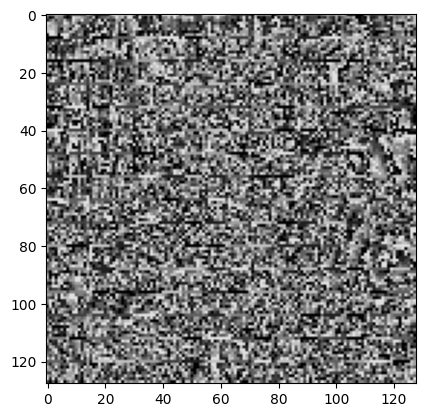

In [8]:
arr = []
with open('1.txt','r') as f:
    for i in f.read().splitlines():
        arr.append(int_to_signed_8bit(int(i)))
arr2 = []
with open('2.txt','r') as f:
    for i in f.read().splitlines():
        arr2.append(int_to_signed_8bit(int(i)))
ar3 = [''.join(i) for i in zip(arr,arr2)]
def q11_5_to_float(binary_str: str) -> float:
    # Convert binary string to signed 16-bit integer
    value = int(binary_str, 2)
    if value & (1 << 15):  # if the sign bit is set
        value -= 1 << 16   # convert to negative using two's complement
    return value / 32.0  # divide by 2^5
print(ar3)
float_array = np.array([q11_5_to_float(b) for b in ar3]).reshape((128,128)).astype(int)
plt.imshow(img, cmap='gray', interpolation=None,vmax=255,vmin=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import serial
import struct
from time import sleep

# === Setup serial port ===
# ComPort = serial.Serial('COM4', baudrate=9600, bytesize=8, parity='N', stopbits=1)
ComPort.flushInput()
ComPort.flushOutput()

# === Image Receive Buffer ===
arr = []

# === Receive 16384 bytes (128x128) ===
for i in range(2*16384):
    byte = ComPort.read(size=1)
    print(byte)
    pixel = int.from_bytes(byte, byteorder='little', signed=False)
    arr.append(pixel)
    print(f"{i}:  {pixel}")
    sleep(0.001)  # Prevent UART overflow

print("✅ Completed reception")
print("Total pixels received:", len(arr))

# === Save to file ===
with open("obtained_imagehaha.txt", 'w') as f:
    for idx, pixel in enumerate(arr):
        f.write(f"{pixel}\n")

# === Display image ===
if len(arr) == 128 * 128:
    img = np.array(arr, dtype=np.uint8).reshape((128, 128))
    plt.imshow(img, cmap='gray')
    plt.title("Received Image")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Error: Did not receive exactly 128x128 pixels.")
print(len(arr))
print(128*128*2)


b'\x00'
0:  0
b'\x00'
1:  0
b'\x00'
2:  0
b'\x00'
3:  0
b'\x00'
4:  0
b'\x00'
5:  0
b'\x00'
6:  0
b'\x00'
7:  0
b'\x00'
8:  0
b'\x00'
9:  0
b'\x00'
10:  0
b'\x00'
11:  0
b'\x00'
12:  0
b'\x00'
13:  0
b'\x00'
14:  0
b'\x00'
15:  0
b'\x00'
16:  0
b'\x00'
17:  0
b'\x00'
18:  0
b'\x00'
19:  0
b'\x00'
20:  0
b'\x00'
21:  0
b'\x00'
22:  0
b'\x00'
23:  0
b'\x00'
24:  0
b'\x00'
25:  0
b'\x00'
26:  0
b'\x00'
27:  0
b'\x00'
28:  0
b'\x00'
29:  0
b'\x00'
30:  0
b'\x00'
31:  0
b'\x00'
32:  0
b'\x00'
33:  0
b'\x00'
34:  0
b'\x00'
35:  0
b'\x00'
36:  0
b'\x00'
37:  0
b'\x00'
38:  0
b'\x00'
39:  0
b'\x00'
40:  0
b'\x00'
41:  0
b'\x00'
42:  0
b'\x00'
43:  0
b'\x00'
44:  0
b'\x00'
45:  0
b'\x00'
46:  0
b'\x00'
47:  0
b'\x00'
48:  0
b'\x00'
49:  0
b'\x00'
50:  0
b'\x00'
51:  0
b'\x00'
52:  0
b'\x00'
53:  0
b'\x00'
54:  0
b'\x00'
55:  0
b'\x00'
56:  0
b'\x00'
57:  0
b'\x00'
58:  0
b'\x00'
59:  0
b'\x00'
60:  0
b'\x00'
61:  0
b'\x00'
62:  0
b'\x00'
63:  0
b'\x00'
64:  0
b'\x00'
65:  0
b'\x00'
66:  0
b'\x0

array([[153, 155, 152, 153, 149, 148, 148, 149],
       [152, 153, 147, 149, 146, 148, 147, 201]])

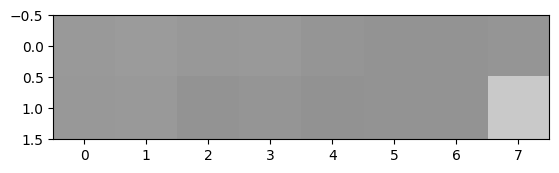

In [21]:
import numpy as np
import cv2

# Load the grayscale image

arr = []
with open('obtained_image.txt') as f:
    for pixel in f.readlines():
        arr.append(int(pixel))
plt.imshow(np.array(arr).reshape((128,128))[:2,:8],cmap='gray',interpolation=None,vmin=0,vmax=255)
np.array(arr).reshape((128,128))[:2,:8]

# Convert the img.txt to coe file

In [12]:
def txt_to_coe(txt_filename, coe_filename, radix=10):
    try:
        with open(txt_filename, 'r') as txt_file:
            lines = [line.strip() for line in txt_file if line.strip()]

        decimal_values = [str(int(line, 2)) for line in lines]  # Convert binary to decimal

        with open(coe_filename, 'w') as coe_file:
            coe_file.write(f"memory_initialization_radix={radix};\n")
            coe_file.write("memory_initialization_vector=\n")
            
            for i, value in enumerate(decimal_values):
                if i == len(decimal_values) - 1:
                    coe_file.write(f"{value};\n")  # End with semicolon
                else:
                    coe_file.write(f"{value},\n")
        
        print(f"Successfully converted {txt_filename} to {coe_filename}")
    except Exception as e:
        print(f"Error: {e}")


# Example usage
txt_to_coe(r'Image.txt', r'output.coe')

Successfully converted Image.txt to output.coe
